<a href="https://colab.research.google.com/github/shumshersubashgautam/Yolo_Classification_Autism-/blob/main/Yolov8_Autism_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [4]:
!cp /content/gdrive/MyDrive/autism.zip /content/

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [7]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.7/107.7 GB disk)


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
%cd {HOME}
!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 5.28M/5.28M [00:00<00:00, 37.6MB/s]
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

100% 104k/104k [00:00<00:00, 2.84MB/s]
100% 755k/755k [00:00<00:00, 16.8MB/s]
image 1/1 /content/dog.jpeg: 224x224 beagle 0.40, basset 0.40, Walker_hound 0.08, English_foxhound 0.03, bloodhound 0.02, 113.6ms
Speed: 0.1ms preprocess, 113.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [10]:
model = YOLO(f'{HOME}/yolov8n-cls.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 224x224 beagle 0.40, basset 0.40, Walker_hound 0.08, English_foxhound 0.03, bloodhound 0.02, 24.1ms
Speed: 0.0ms preprocess, 24.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [12]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/autism epochs=100 imgsz=128

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/autism, epochs=100, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None

In [15]:
!ls -la {HOME}/runs/classify/train2/

total 840
drwxr-xr-x 3 root root   4096 Mar 11 14:34 .
drwxr-xr-x 4 root root   4096 Mar 11 14:33 ..
-rw-r--r-- 1 root root   1364 Mar 11 14:33 args.yaml
-rw-r--r-- 1 root root 813240 Mar 11 16:05 events.out.tfevents.1678545204.b640d7daec54.1666.0
-rw-r--r-- 1 root root  19392 Mar 11 16:05 results.csv
drwxr-xr-x 2 root root   4096 Mar 11 14:34 weights


In [16]:
!cat {HOME}/runs/classify/train2/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      0,                0.17356,                0.51786,                      1,                0.61447,               0.070181,              0.0033133,              0.0033133
                      1,                0.17399,                  0.625,                      1,                0.58349,               0.040115,              0.0065808,              0.0065808
                      2,                0.16901,                0.77857,                      1,                 0.5318,              0.0099831,              0.0097823,              0.0097823
                      3,                0.16661,                0.78571,                      1,                0.50892,               0.009703,               0.009703,               0.009703
                      4,                

In [18]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train2/weights/best.pt data=/content/autism

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
               classes   top1_acc   top5_acc: 100% 18/18 [00:02<00:00,  8.32it/s]
                   all      0.832          1
Speed: 0.0ms preprocess, 3.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [20]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autism/test/Autistic/

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/autism/test/Autistic/001.jpg: 128x128 Autistic 0.93, Non_Autistic 0.07, 8.2ms
image 2/140 /content/autism/test/Autistic/002.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 10.8ms
image 3/140 /content/autism/test/Autistic/003.jpg: 128x128 Autistic 0.85, Non_Autistic 0.15, 8.6ms
image 4/140 /content/autism/test/Autistic/004.jpg: 128x128 Autistic 0.93, Non_Autistic 0.07, 6.3ms
image 5/140 /content/autism/test/Autistic/005.jpg: 128x128 Autistic 0.90, Non_Autistic 0.10, 6.2ms
image 6/140 /content/autism/test/Autistic/006.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 7.8ms
image 7/140 /content/autism/test/Autistic/007.jpg: 128x128 Autistic 0.77, Non_Autistic 0.23, 7.5ms
image 8/140 /content/autism/test/Autistic/008.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 6.1ms
image 9/140 /content/autism/test/Autistic/009.jpg:

In [21]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autism/test/Non_Autistic/

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/autism/test/Non_Autistic/001.jpg: 128x128 Non_Autistic 0.86, Autistic 0.14, 23.9ms
image 2/140 /content/autism/test/Non_Autistic/002.jpg: 128x128 Non_Autistic 0.89, Autistic 0.11, 10.2ms
image 3/140 /content/autism/test/Non_Autistic/003.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 10.6ms
image 4/140 /content/autism/test/Non_Autistic/004.jpg: 128x128 Non_Autistic 0.98, Autistic 0.02, 10.2ms
image 5/140 /content/autism/test/Non_Autistic/005.jpg: 128x128 Non_Autistic 0.98, Autistic 0.02, 10.1ms
image 6/140 /content/autism/test/Non_Autistic/006.jpg: 128x128 Non_Autistic 0.94, Autistic 0.06, 9.7ms
image 7/140 /content/autism/test/Non_Autistic/007.jpg: 128x128 Non_Autistic 0.85, Autistic 0.15, 9.7ms
image 8/140 /content/autism/test/Non_Autistic/008.jpg: 128x128 Non_Autistic 0.88, Autistic 0.12, 10.5ms
image 9/140 /

In [22]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autism/valid/Autistic/

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/autism/valid/Autistic/01.jpg: 128x128 Autistic 0.68, Non_Autistic 0.32, 8.9ms
image 2/40 /content/autism/valid/Autistic/02.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 12.1ms
image 3/40 /content/autism/valid/Autistic/03.jpg: 128x128 Autistic 0.85, Non_Autistic 0.15, 6.7ms
image 4/40 /content/autism/valid/Autistic/04.jpg: 128x128 Autistic 0.93, Non_Autistic 0.07, 6.6ms
image 5/40 /content/autism/valid/Autistic/05.jpg: 128x128 Autistic 0.90, Non_Autistic 0.10, 6.9ms
image 6/40 /content/autism/valid/Autistic/06.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 6.3ms
image 7/40 /content/autism/valid/Autistic/07.jpg: 128x128 Autistic 0.77, Non_Autistic 0.23, 7.0ms
image 8/40 /content/autism/valid/Autistic/08.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 6.0ms
image 9/40 /content/autism/valid/Autistic/09.jpg: 128x128 

In [23]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autism/valid/Non_Autistic/

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/40 /content/autism/valid/Non_Autistic/01.jpg: 128x128 Non_Autistic 0.86, Autistic 0.14, 8.1ms
image 2/40 /content/autism/valid/Non_Autistic/02.jpg: 128x128 Non_Autistic 0.89, Autistic 0.11, 6.6ms
image 3/40 /content/autism/valid/Non_Autistic/03.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 6.1ms
image 4/40 /content/autism/valid/Non_Autistic/04.jpg: 128x128 Non_Autistic 0.98, Autistic 0.02, 9.8ms
image 5/40 /content/autism/valid/Non_Autistic/05.jpg: 128x128 Non_Autistic 0.98, Autistic 0.02, 8.5ms
image 6/40 /content/autism/valid/Non_Autistic/06.jpg: 128x128 Non_Autistic 0.94, Autistic 0.06, 6.6ms
image 7/40 /content/autism/valid/Non_Autistic/07.jpg: 128x128 Non_Autistic 0.85, Autistic 0.15, 6.3ms
image 8/40 /content/autism/valid/Non_Autistic/08.jpg: 128x128 Non_Autistic 0.88, Autistic 0.12, 7.2ms
image 9/40 /content/autism/

# **Real Autism found in Tiktok It predicts well on testing this data!! **

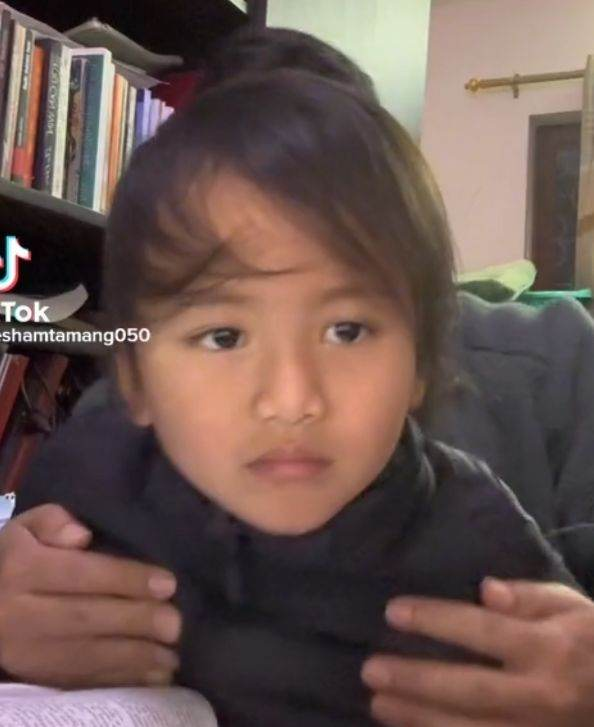

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autistic-nepalpatient-1.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [26]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autistic-nepalpatient-1.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autistic-nepalpatient-1.jpg: 128x128 Autistic 0.95, Non_Autistic 0.05, 17.8ms
Speed: 0.0ms preprocess, 17.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


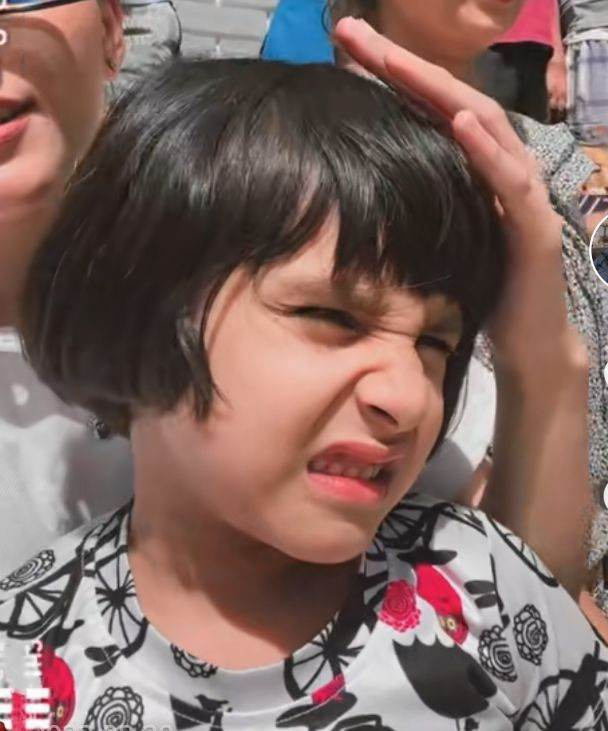

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autism-case2.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [29]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autism-case2.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autism-case2.jpg: 128x128 Non_Autistic 0.52, Autistic 0.48, 10.3ms
Speed: 0.0ms preprocess, 10.3ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


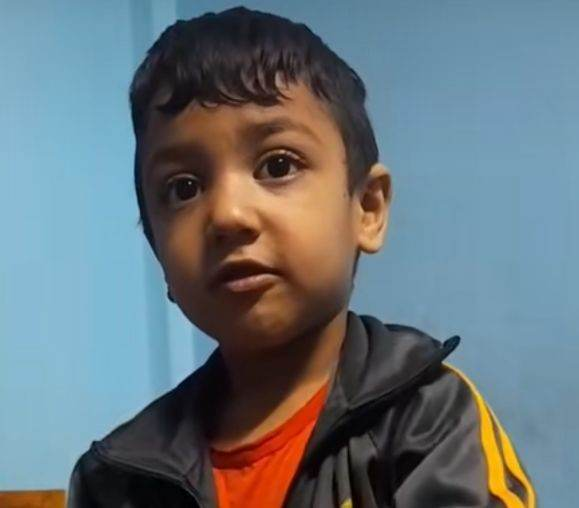

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autismcase3.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [32]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autismcase3.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autismcase3.jpg: 128x128 Autistic 0.77, Non_Autistic 0.23, 12.7ms
Speed: 0.1ms preprocess, 12.7ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


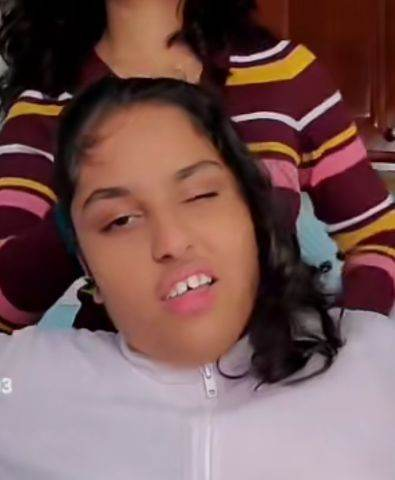

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autismcase4.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [34]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autismcase4.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autismcase4.jpg: 128x128 Non_Autistic 0.82, Autistic 0.18, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


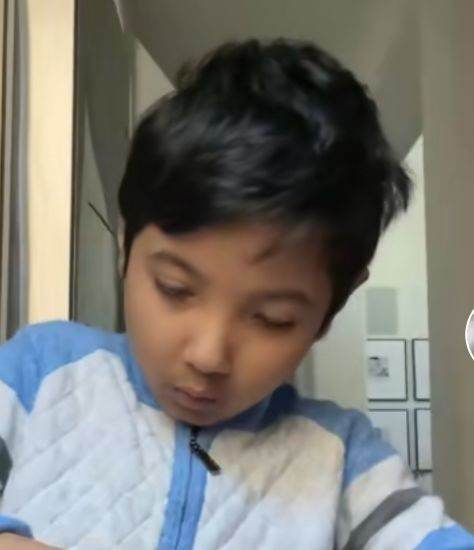

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autisticcase5.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [36]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autisticcase5.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autisticcase5.jpg: 128x128 Autistic 0.87, Non_Autistic 0.13, 11.2ms
Speed: 0.0ms preprocess, 11.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


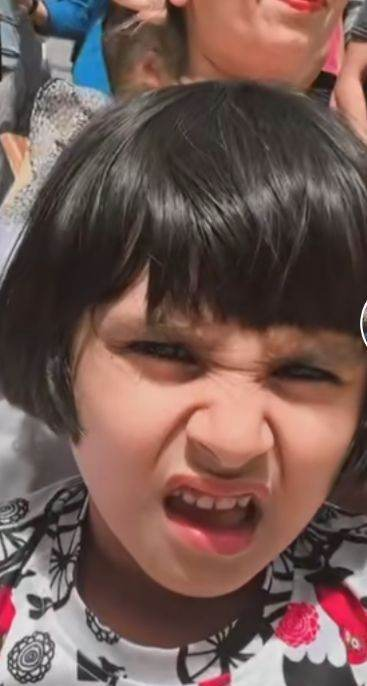

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autcase6.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [38]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autcase6.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autcase6.jpg: 128x128 Autistic 0.97, Non_Autistic 0.03, 12.5ms
Speed: 0.0ms preprocess, 12.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


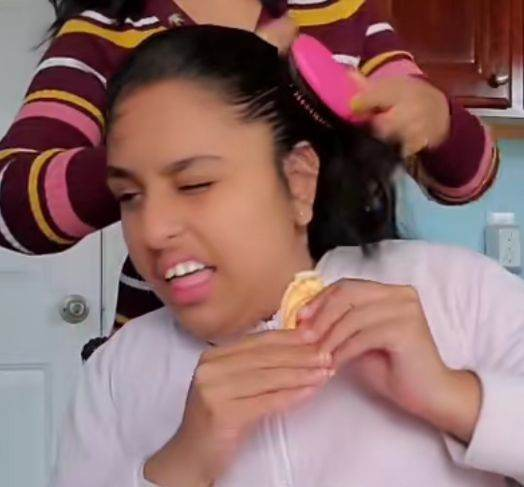

In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autistic1.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [40]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autistic1.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autistic1.jpg: 128x128 Autistic 0.55, Non_Autistic 0.45, 13.0ms
Speed: 0.0ms preprocess, 13.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


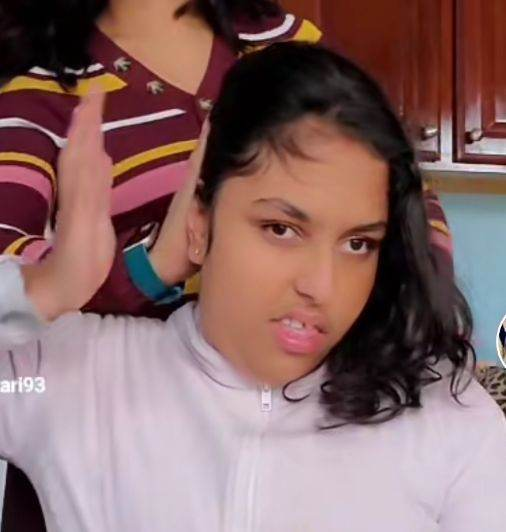

In [41]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autistic2.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [42]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autistic2.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autistic2.jpg: 128x128 Autistic 0.54, Non_Autistic 0.46, 13.1ms
Speed: 0.1ms preprocess, 13.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


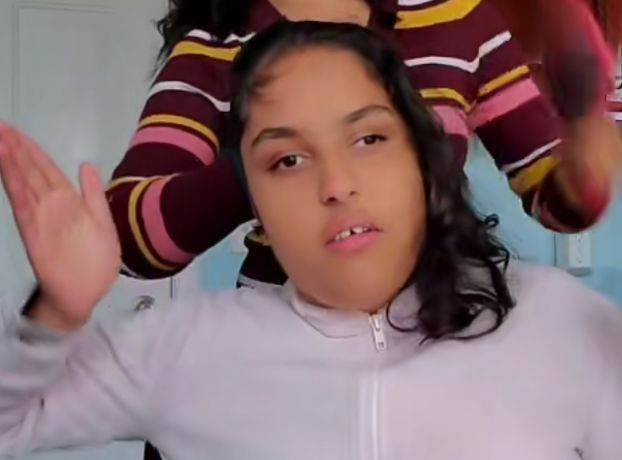

In [43]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autistic3.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [44]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source=./autistic3.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autistic3.jpg: 128x128 Non_Autistic 0.60, Autistic 0.40, 8.4ms
Speed: 0.0ms preprocess, 8.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
